In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

data = pd.read_csv("D:/Dataset/Stroke_Prediction/healthcare-dataset-stroke-data.csv")
data.drop('id', axis = 1, inplace = True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,yes
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,yes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 422.0+ KB


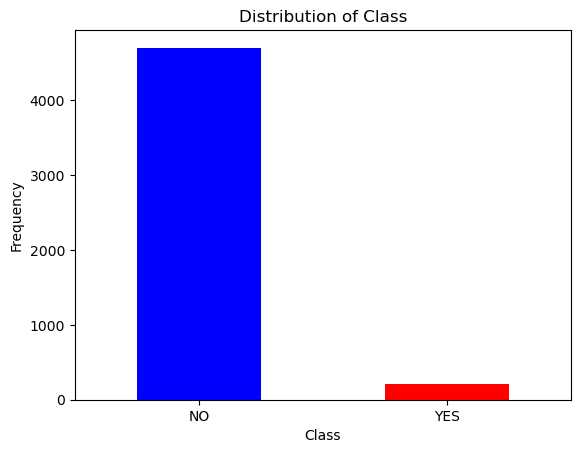

In [3]:
labels = ['NO','YES']
sh = pd.Series(data['stroke']).value_counts(sort = True)
sh.plot(kind = 'bar',rot = 0,color = ['blue','red'])
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title('Distribution of Class')
plt.show()

Label Encoding

In [4]:
encoder = LabelEncoder()
cols = [col for col in data.columns if col not in data.select_dtypes(include = np.number)]
for col in cols:
    data[col] = encoder.fit_transform(data[col])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Heatmap showing correlation between variables

<Axes: >

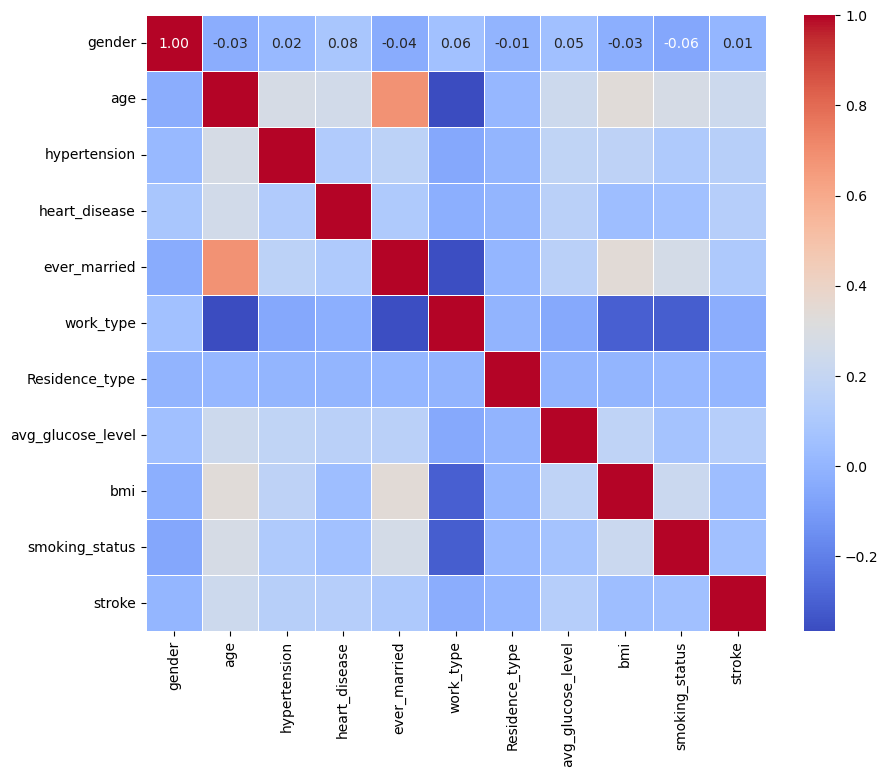

In [5]:
corr = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot = True, cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

Splitting Data 

In [6]:
X_features = data.iloc[:,0:10]
y_label = data.iloc[:,10]

Splitting data to training data and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)
print('Size of train set: ',X_train.shape)
print('Size of test set: ',X_test.shape)

Size of train set:  (3927, 10)
Size of test set:  (982, 10)


Applying Algorithms

### Naive Bayes Classifier

### Random Forest classifier

#### Using Grid search CV

Grid Search CV works by selecting the combination of all parameters in the parameter grid and gives the best combination of parameter which increases the model's performance

Balancing Class

#### Applying Naive Bayes Classifier for balanced data

#### Applying Random Forest CLassifier for balanced data

Selecting Random Forest classifier to predict new data

In [8]:
rmodel = RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 50)
rmodel.fit(X_train, y_train)
import pickle

with open('stroke_predicton_model.pkl', 'wb') as file:
    pickle.dump(rmodel, file)

In [9]:
new_data = np.array([[1,50.0,0,0,1,2,1,100.00,29.0,0]])
new_df = pd.DataFrame(new_data, columns = X_features.columns)
rf_pred = rmodel.predict(new_df)

if rf_pred[0]:
    print('Prediction: Stroke risk is high.')
else:
    print('Prediction: No stroke risk detected.')

Prediction: No stroke risk detected.
